In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
data = pd.read_csv("PatientInfo.csv")
data.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [38]:
data.isnull().sum()

patient_id               0
global_num             904
sex                    145
birth_year             454
age                    261
country                  0
province                 0
city                    65
disease               2199
infection_case        1055
infection_order       2176
infected_by           1749
contact_number        1807
symptom_onset_date    2025
confirmed_date         141
released_date         1995
deceased_date         2186
state                   88
dtype: int64

In [48]:

data.columns.tolist()

['patient_id',
 'sex',
 'birth_year',
 'age',
 'disease',
 'infection_order',
 'infected_by',
 'contact_number',
 'symptom_onset_date',
 'state']

In [52]:
data = data.dropna(subset=['sex', 'age'])
data.shape

(1955, 10)

In [54]:
# Define columns you want to drop
drop_cols = ['global_num', 'city', 'province', 'country', 'confirmed_date', 
             'released_date', 'deceased_date', 'infection_case']

# Drop only the columns that are present in the data
data = data.drop(columns=[col for col in drop_cols if col in data.columns])

# Drop rows with missing values in known columns
data = data.dropna(subset=['sex', 'age'])

# Check final shape
data.shape


(1955, 10)

In [56]:
data = pd.get_dummies(data, columns=['sex', 'disease'], drop_first=True)

In [58]:
X = data.drop(columns=['patient_id', 'state', 'symptom_onset_date', 'contact_number', 'infected_by'])
y = data['state']

In [66]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Check for missing values in y_train
print(y_train.isnull().sum())

# Check unique classes
print(y_train.unique())

# Check type
print(y_train.dtype)

1
['isolated' 'released' nan 'deceased']
object


In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [80]:
import pandas as pd

# Ensure y_train and y_test are pandas Series (not numpy arrays)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Now safe to use .isnull()
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Nulls in y_train:", y_train.isnull().sum())
print("y_train type:", type(y_train))
print("y_train dtype:", y_train.dtype)
print("y_train values:", y_train.unique())

X_train shape: (1564, 4)
y_train shape: (1564,)
Nulls in y_train: 0
y_train type: <class 'pandas.core.series.Series'>
y_train dtype: int64
y_train values: [1 2 3 0]


In [100]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
print("X_train type:", type(X_train))
print("X_train shape:", X_train.shape)

# Check for nulls
print("Nulls in X_train:\n", pd.DataFrame(X_train).isnull().sum())

# Show data type of each column
print("\nX_train dtypes:\n", pd.DataFrame(X_train).dtypes)

X_train type: <class 'pandas.core.frame.DataFrame'>
X_train shape: (1564, 4)
Nulls in X_train:
 birth_year          244
age                   0
infection_order    1528
sex_male              0
dtype: int64

X_train dtypes:
 birth_year         float64
age                 object
infection_order    float64
sex_male              bool
dtype: object


In [88]:
# Convert 'age' to numeric
X_train['age'] = pd.to_numeric(X_train['age'], errors='coerce')

# Fill missing values with median (safe method)
for col in ['birth_year', 'infection_order', 'age']:
    X_train[col] = X_train[col].fillna(X_train[col].median())

# Convert boolean to int
X_train['sex_male'] = X_train['sex_male'].astype(int)

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
for col in ['birth_year', 'infection_order', 'age']:
    X_train[col] = X_train[col].fillna(X_train[col].median())

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
X_test['age'] = pd.to_numeric(X_test['age'], errors='coerce')
for col in ['birth_year', 'infection_order', 'age']:
    X_test[col] = X_test[col].fillna(X_train[col].median())  # Use train median
X_test['sex_male'] = X_test['sex_male'].astype(int)

# Predict and evaluate
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7953964194373402

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.80      0.99      0.89       310
           2       0.67      0.03      0.05        74

    accuracy                           0.80       391
   macro avg       0.65      0.39      0.39       391
weighted avg       0.77      0.80      0.72       391


Confusion Matrix:
 [[  1   6   0]
 [  1 308   1]
 [  0  72   2]]


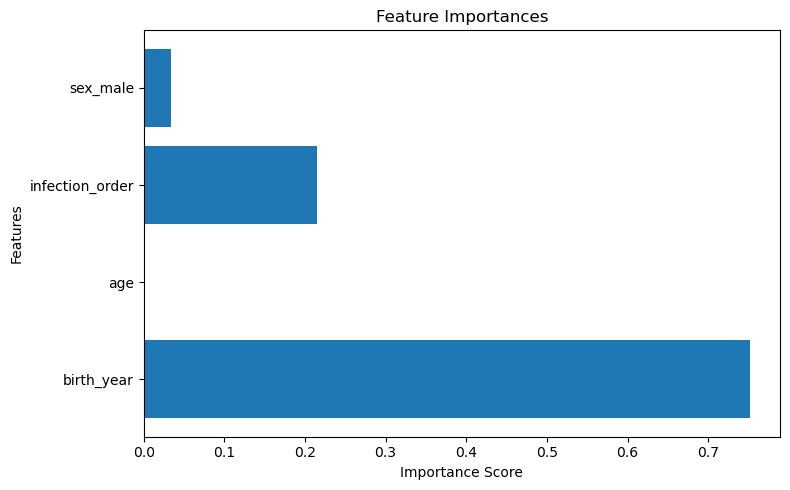

In [98]:
# Plot feature importances
importances = rf_model.feature_importances_
features = X_train.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()